# CSMODEL Case Study

# Phase 1

[Group 8] Bantolino, De Leon, Dimalanta

## Dataset Description

### [Global Youtube Statistic 2023](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023)
The dataset Global Youtube Statistics 2023 presents statistics of the most subscribed Youtube channels of 2023. Found inside are comprehensive details on top creators' statistics such as subscriber count, video views, upload frequency, earnings and more. The dataset was retrieved in Kaggle with a 10.0 usability rate, and is said to be updated annually. 

The data is collected and compiled from various reputable sources as per the dataset's website.

In each row found in the dataset represent a YouTube channel, along with its respective statistics. In each column represents a variable associated to the YouTube channel. The dataset has 995 observations, and 29 variables.


### Variables
Presented below are variables found in the dataset.

|    	| Variable name                             	| Data type 	| Description                                                                  	|
|:----	|:-------------------------------------------	|:-------------	|:------------------------------------------------------------------------------	|
| 1  	| ```rank```                                	| int64     	| Position of the YouTube channel based on the number of subscribers.          	|
| 2  	| ```youtuber```                            	| object    	| Name of the YouTube channel                                                  	|
| 3  	| ```subscribers```                         	| int64     	| Number of subscribers of the channel                                         	|
| 4  	| ```video_views```                         	| float64   	| Number of total views a channel has                                          	|
| 5  	| ```category```                            	| object    	| Category or niche of the channel                                             	|
| 6  	| ```title```                               	| object    	| Title of the Youtube channel                                                 	|
| 7  	| ```uploads```                             	| int64     	| Total number of videos uploaded on the channel                               	|
| 8  	| ```country```                             	| object    	| Country where the YouTube channel originates                                 	|
| 9  	| ```abbreviation```                        	| object    	| Abbreviation of the country                                                  	|
| 10 	| ```channel_type```                        	| object    	| Type of the YouTube channel (e.g. individual, brand)                         	|
| 11 	| ```video_views_rank```                     	| float64   	| Ranking of the channel based on total video views                            	|
| 12 	| ```country_rank```                        	| float64   	| Ranking of the channel based on the number of subscribers within its country 	|
| 13 	| ```channel_type_rank```                   	| float64   	| Ranking of the channel based on its type                                     	|
| 14 	| ```video_views_for_the_last_30_days```    	| float64   	| Total video views in the last 30 days                                        	|
| 15 	| ```lowest_monthly_earnings```             	| float64   	| Lowest estimated monthly earning fro the channel in US Dollars               	|
| 16 	| ```highest_monthly_earnings```            	| float64   	| Highest estimated monthly earnings from the channel in US Dollars            	|
| 17 	| ```lowest_yearly_earnings```              	| float64   	| Lowest estimated yearly earnings from the channel in US Dollars`             	|
| 18 	| ```highest_yearly_earnings```             	| float64   	| Highest estimated yearly earnings from the channel in US Dollars             	|
| 19 	| ```subscribers_for_last_30_days```        	| float64   	| Number of new subscribers gained in the last 30 days                         	|
| 20 	| ```created_year```                        	| float64   	| Year when the YouTube channel was created                                    	|
| 21 	| ```created_month```                       	| object    	| Month when the YouTube channel was created                                   	|
| 22 	| ```created_date```                        	| float64   	| Exact date of the YouTube channel's creation                                 	|
| 23 	| ```gross_tertiary_education_enrollment``` 	| float64   	| Percentage of the population enrolled in tertiary education in the country   	|
| 24 	| ```population```                          	| float64   	| Total population of the country                                              	|
| 25 	| ```unemployment_rate```                   	| float64   	| Unemployment rate in the country in percentage                               	|
| 26 	| ```urban_population```                    	| float64   	| Percentage of the population living in urban areas                           	|
| 27 	| ```latitude```                            	| float64   	| Latitudinal coordinate of the country's location                             	|
| 28 	| ```longitude```                           	| float64   	| Longitudinal coordinate of the country's location                            	|

&nbsp;<br>

## Data Cleaning

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns


&nbsp;<br>

### Checking for incorrect data types

In [177]:
youtube_df = pd.read_csv("Global YouTube Statistics.csv", encoding="latin1")
# , encoding='iso-8859-1'
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   country                                  873 non-null    object 
 8   abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

All variables are accounted for and there is no observation for incorrect data types. 

However, the video views variable is an interesting case since it is represented as a float64 instead of int64. Floats tend to be less precise when the value is really high or really low, but it could represent a wider range than an integer could.
This is an acceptable compromise since video views tend to get really large especially if viewers viewed a video multiple times. 
Instead of the precise video views for large numbers, an estimate is replaced (see max number in video views).
For large numbers, the precision is not that important for our findings. When the numbers are really high, estimates are sufficient to find trends and patterns since small precise numbers do not have a big effect on the most significant digits that are estimated.

In [178]:
# sorted video views in descending order
youtube_df[['youtuber', 'video views']].sort_values('video views', axis='index', ascending=False).head(10)

,youtuber,video views
0,T-Series,2.280000e+11
3,Cocomelon - Nursery Rhymes,1.640000e+11
4,SET India,1.480000e+11
15,Sony SAB,1.010000e+11
6,ýýý Kids Diana Show,9.324704e+10
8,Like Nastya,9.047906e+10
11,WWE,7.742847e+10
9,Vlad and Niki,7.718017e+10
21,Zee TV,7.313905e+10
26,Colors TV,6.151091e+10


&nbsp;<br>

### Checking for Multiple Representations

#### Youtuber

In [179]:
youtuber_counts = youtube_df['youtuber'].value_counts()

multiple_representations = youtuber_counts[youtuber_counts > 1]

if not multiple_representations.empty:
    print("There are multiple representations.")
    print(multiple_representations)
else:
    print("There are no multiple representations.")


print("There are " + str(len(youtube_df['youtuber'].unique())) + " unique YouTubers \n")
youtuber_df = youtube_df['youtuber']

There are no multiple representations.
There are 995 unique YouTubers 



Despite multiple YouTube channels being under the same person/company, the group decided not to combine or remove them as these channels may have different premises/content amongst them. There are 995 unique youtuber entities.

&nbsp;<br>

#### Category

In [180]:
categories_df = youtube_df['category'].unique()
sorted_categories = pd.Series(categories_df).sort_values(na_position='last')

for variable in sorted_categories:
    print(variable)

print('\nNumber of Categories:', len(sorted_categories))

Autos & Vehicles
Comedy
Education
Entertainment
Film & Animation
Gaming
Howto & Style
Movies
Music
News & Politics
Nonprofits & Activism
People & Blogs
Pets & Animals
Science & Technology
Shows
Sports
Trailers
Travel & Events
nan

Number of Categories: 19


There are 19 entities present in the dataset for the variable category, 18 excluding nan. There are no duplicates for the variable category

&nbsp;<br>

#### Title

In [181]:
print("There are " + str(len(youtube_df['title'].unique())) + " unique titles \n")
title_df = youtube_df[youtube_df['title'].duplicated(keep=False)]
print(title_df[['title']])

There are 992 unique titles 

                title
8    Like Nastya Vlog
265           Preston
458  Like Nastya Vlog
729           Preston
783   #Refugio Mental
939   #Refugio Mental


In [182]:
like_nastya_df = youtube_df[youtube_df['title'] == 'Like Nastya Vlog']
like_nastya_df

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment (%),population,unemployment_rate,urban_population,latitude,longitude
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,144373535.0,4.59,107683889.0,61.52401,105.318756
458,459,Like Nastya Vlog,18500000,8.147576e+09,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,144373535.0,4.59,107683889.0,61.52401,105.318756


In [183]:
preston_df = youtube_df[youtube_df['title'] == 'Preston']
preston_df

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment (%),population,unemployment_rate,urban_population,latitude,longitude
265,266,Preston,24000000,8.279004e+09,Gaming,Preston,4009,United States,US,Entertainment,...,200000.0,2012.0,Jul,4.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
729,730,PrestonPlayz,14600000,5.766647e+09,Gaming,Preston,4009,United States,US,Entertainment,...,200000.0,2012.0,Jul,4.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


In [184]:
refugio_df = youtube_df[youtube_df['title'] == '#Refugio Mental']
refugio_df

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment (%),population,unemployment_rate,urban_population,latitude,longitude
783,784,#Refugio Mental,14100000,3.594937e+09,Entertainment,#Refugio Mental,846,NaN,NaN,Entertainment,...,NaN,2013.0,Aug,10.0,NaN,NaN,NaN,NaN,NaN,NaN
939,940,#Refï¿½ï¿½ï¿½ï¿½,12700000,2.709954e+09,Entertainment,#Refugio Mental,846,NaN,NaN,Entertainment,...,NaN,2013.0,Aug,10.0,NaN,NaN,NaN,NaN,NaN,NaN


There are three duplicate title entries belonging to unique YouTube channels managed by the same person. Additionally, it appears as if that the data for the succeeding variables is tied to the title variable rather than the Youtuber itself. For this reason, both observations need to be dropped since just retaining the highest-ranking channel would lead to skewed data, and it seems like both data is based on the title

In [185]:
rows_to_drop = [8, 458, 265, 729, 783, 939]
youtube_df.drop(rows_to_drop, inplace=True)


&nbsp;<br>

#### Country

In [186]:
country_df = youtube_df['country']
print("The number of unique country are: " + str(len(country_df.unique())))
print(country_df.unique())

The number of unique country are: 50
['India' 'United States' nan 'Japan' 'South Korea' 'United Kingdom'
 'Canada' 'Brazil' 'Argentina' 'Chile' 'Russia' 'Cuba' 'El Salvador'
 'Pakistan' 'Philippines' 'Thailand' 'Colombia' 'Barbados' 'Mexico'
 'United Arab Emirates' 'Spain' 'Saudi Arabia' 'Indonesia' 'Turkey'
 'Venezuela' 'Kuwait' 'Jordan' 'Netherlands' 'Singapore' 'Australia'
 'Italy' 'Germany' 'France' 'Sweden' 'Afghanistan' 'Ukraine' 'Latvia'
 'Switzerland' 'Vietnam' 'Malaysia' 'China' 'Iraq' 'Egypt' 'Andorra'
 'Ecuador' 'Morocco' 'Peru' 'Bangladesh' 'Finland' 'Samoa']


There are 50 unique countries present in the dataset, 49 excluding nan. There are no duplicate entries for the country variable.

Abbreviation

In [187]:
abbreviation_df = youtube_df['abbreviation']
print("The number of unique abbreviations are: " + str(len(abbreviation_df.unique())))
print(abbreviation_df.unique())


The number of unique abbreviations are: 50
['IN' 'US' nan 'JP' 'KR' 'GB' 'CA' 'BR' 'AR' 'CL' 'RU' 'CU' 'SV' 'PK' 'PH'
 'TH' 'CO' 'BB' 'MX' 'AE' 'ES' 'SA' 'ID' 'TR' 'VE' 'KW' 'JO' 'NL' 'SG'
 'AU' 'IT' 'DE' 'FR' 'SE' 'AF' 'UA' 'LV' 'CH' 'VN' 'MY' 'CN' 'IQ' 'EG'
 'AD' 'EC' 'MA' 'PE' 'BD' 'FI' 'WS']


There are 50 unique abbreviations present in the dataset, 49 excluding nan. There are no duplicate entries for the abbreviation variable.

&nbsp;<br>

#### Channel Type

In [188]:
channel_type_df = youtube_df['channel_type']
print("The number of unique channel_type are: " + str(len(channel_type_df.unique())))
print(channel_type_df.unique())

The number of unique channel_type are: 15
['Music' 'Games' 'Entertainment' 'Education' 'Sports' 'Film' 'News' nan
 'People' 'Comedy' 'Howto' 'Nonprofit' 'Autos' 'Tech' 'Animals']


There are 15 entities present in the dataset for the variable channel_type, 14 excluding nan. There are no duplicates for the variable channel_type.

&nbsp;<br>

In [189]:
created_month_df = youtube_df['created_month']
print("The number of unique created months are: " + str(len(created_month_df.unique())))
print(created_month_df.unique())

The number of unique created months are: 13
['Mar' 'Feb' 'Sep' 'May' 'Apr' 'Dec' 'Jun' 'Aug' 'Jul' 'Jan' 'Oct' 'Nov'
 nan]


There are 13 entities present in the dataset for the variable created_month, 12 excluding nan. There are no duplicates for the variable created_month.

&nbsp;<br>

### Checking for default values and missing data

In [190]:
nan_variables = youtube_df.columns[youtube_df.isnull().any()].tolist()
print("Number of variables with NaN values: " + str(len(nan_variables)))
print("The variables with NaN values are as follows:")
for variable in nan_variables:
    print(variable)


Number of variables with NaN values: 18
The variables with NaN values are as follows:
category
country
abbreviation
channel_type
video_views_rank
country_rank
channel_type_rank
video_views_for_the_last_30_days
subscribers_for_last_30_days
created_year
created_month
created_date
gross_tertiary_education_enrollment (%)
population
unemployment_rate
urban_population
latitude
longitude


In [191]:
print("The number of NaN values per variable are as follows:")
youtube_df[nan_variables].isnull().sum()

The number of NaN values per variable are as follows:


category                                    46
country                                    120
abbreviation                               120
channel_type                                30
video_views_rank                             1
country_rank                               114
channel_type_rank                           33
video_views_for_the_last_30_days            56
subscribers_for_last_30_days               335
created_year                                 5
created_month                                5
created_date                                 5
gross_tertiary_education_enrollment (%)    121
population                                 121
unemployment_rate                          121
urban_population                           121
latitude                                   121
longitude                                  121
dtype: int64

#### Category

In [192]:
youtuber_category_isNaN = youtube_df[youtube_df['category'].isna()][['youtuber', 'category']]
youtuber_category_isNaN.head(50)


,youtuber,category
5,Music,NaN
12,Gaming,NaN
18,Sports,NaN
91,Vlad vï¿½ï¿½ï,NaN
102,News,NaN
132,BETER Bï¿½ï¿½,NaN
155,Diana and Roma ESP,NaN
161,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,NaN
173,Popular on YouTube,NaN
214,D Billions,NaN


#### Country

In [193]:
youtube_df[youtube_df['population'].isna()].head(100)

# answer: not all youtube channels have a country. It seems to occur randomly since popular youtubers such as jacksepticeye has no country

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment (%),population,unemployment_rate,urban_population,latitude,longitude
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,2.411823e+10,Film & Animation,goldmines,1,NaN,NaN,Music,...,NaN,2006.0,Aug,15.0,NaN,NaN,NaN,NaN,NaN,NaN
38,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,3.231243e+10,Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,NaN,...,NaN,2016.0,Nov,29.0,NaN,NaN,NaN,NaN,NaN,NaN
48,49,Badabun,46800000,1.939805e+10,Entertainment,badabun,1,NaN,NaN,Music,...,75.0,2007.0,Jul,21.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,ZutiGang,14900000,1.591332e+10,People & Blogs,ZutiGang,1363,NaN,NaN,People,...,400000.0,2021.0,Mar,5.0,NaN,NaN,NaN,NaN,NaN,NaN
710,711,Major Lazer Official,14800000,9.383431e+09,Music,MajorLazerOfficial,0,NaN,NaN,NaN,...,NaN,2013.0,Jun,14.0,NaN,NaN,NaN,NaN,NaN,NaN
750,751,Hear This Music,14500000,9.201428e+09,Music,Hear This Music,39,NaN,NaN,Music,...,100000.0,2016.0,Feb,13.0,NaN,NaN,NaN,NaN,NaN,NaN
755,756,NOBRU,14400000,3.517633e+08,Gaming,nobru,2,NaN,NaN,People,...,1.0,2006.0,Feb,3.0,NaN,NaN,NaN,NaN,NaN,NaN


The group decided not to drop rows that has nan country since the method (pandas.crosstab) does not include nan values when counting the frequency. This is relevant for our EDA question of 'Do individual countries have a popular channel_type?'

#### Channel_type

In [194]:
youtube_df[youtube_df['channel_type'].isna()].head(100)

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment (%),population,unemployment_rate,urban_population,latitude,longitude
38,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,3.231243e+10,Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,NaN,...,NaN,2016.0,Nov,29.0,NaN,NaN,NaN,NaN,NaN,NaN
57,58,BRIGHT SIDE,44500000,1.070853e+10,Howto & Style,brightside,0,NaN,NaN,NaN,...,1.0,2005.0,Nov,18.0,NaN,NaN,NaN,NaN,NaN,NaN
102,103,News,36300000,0.000000e+00,NaN,News,0,NaN,NaN,NaN,...,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
149,150,Luis Fonsi,31400000,1.517676e+10,Entertainment,luisfonsi,0,NaN,NaN,NaN,...,NaN,2006.0,Mar,31.0,NaN,NaN,NaN,NaN,NaN,NaN
166,167,Frost Diamond,30100000,7.277494e+09,Gaming,frostdiamond,0,NaN,NaN,NaN,...,6.0,2006.0,Aug,10.0,NaN,NaN,NaN,NaN,NaN,NaN
178,179,Shorts Break,29000000,1.946624e+10,Comedy,shorts break,42,NaN,NaN,NaN,...,151.0,2021.0,Jan,28.0,NaN,NaN,NaN,NaN,NaN,NaN
183,184,Masha y el Oso,28300000,1.357714e+10,Film & Animation,Masha y El oso,6,NaN,NaN,NaN,...,NaN,2019.0,Jul,21.0,NaN,NaN,NaN,NaN,NaN,NaN
190,191,Sandeep Maheshwari,27800000,2.303069e+09,People & Blogs,Sandeepmaheshwari,0,Singapore,SG,NaN,...,1.0,2008.0,Jan,2.0,84.8,5.703569e+06,4.11,5703569.0,1.352083,103.819836
226,227,Fede Vigevani,25600000,7.962726e+09,Howto & Style,Fede Vigevani,0,NaN,NaN,NaN,...,2.0,2019.0,Aug,1.0,NaN,NaN,NaN,NaN,NaN,NaN
236,237,Chris Brown,25200000,1.552057e+10,Music,ChrisBrown,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The group decided not to drop rows that has nan channel_type since the methods (pandas.groupby, pandas.value_counts, pandas.crosstab) does not include nan values when computing for their outputs. This is relevant for our EDA question of 'Do individual countries have a popular channel_type?', 'is there a correlation between channel_type and lowest_monthly_earnings?', and 'What are the most common 'channel_type, and do they tend to have more subscribers'.

#### lowest_monthly_earnings and highest_monthly_earnings

Both variables has a default value of 0

In [195]:
youtube_df[youtube_df['lowest_monthly_earnings'] == 0]['lowest_monthly_earnings'].count()

118

In [196]:
youtube_df[youtube_df['highest_monthly_earnings'] == 0]['highest_monthly_earnings'].count()

89

The count of lowest_monthly_earnings is not equal to the highest_monthly_earnings. Let us investigate on that difference

In [197]:
youtube_df.query('lowest_monthly_earnings == 0 and highest_monthly_earnings != 0')[['youtuber', 'lowest_monthly_earnings', 'highest_monthly_earnings']]

,youtuber,lowest_monthly_earnings,highest_monthly_earnings
1,YouTube Movies,0.0,0.05
14,Goldmines,0.0,0.07
18,Sports,0.0,0.06
27,T-Series Bhakti Sagar,0.0,0.04
62,HolaSoyGerman.,0.0,0.02
75,Toys and Colors,0.0,0.02
77,LUCCAS NETO - LUCCAS TOON,0.0,0.01
174,Maluma,0.0,0.06
183,Masha y el Oso,0.0,0.01
200,ToyPuddingTV,0.0,0.06


We can see that the observations returned to us is __close to 0__. This could be a __representation error__ since the monthly earning variables are represented by float. It is known that float has a difficult time representing precise values. It is also impossible that big channels like T-Series Bhakti Sagar is only producing 0.04 dollars per month.  That is why it is safe to assume that these are representation errors.

As we can see, there are 29 observations that has a default value of 0 for lowest_monthly_earnings and is misrepresented by highest_monthly_earnings.

When we add 29 misrepresented highest_monthly_earnings with the 89 highest_monthly_earnings that has a default value of 0, we have a sum of 118.

118 is equal to the lowest_monthly_earnings.

Therefore, it is safe to assume that for those who did not enter a lowest_monthly_earnings also did not enter a highest_monthly_earnings


Let us double check if there are more misrepresentation. Instead of checking equality of 0, let us use the operator less than <. We will be using a small value

In [198]:
youtube_df.query('lowest_monthly_earnings < 1 and highest_monthly_earnings < 1')[['youtuber', 'lowest_monthly_earnings', 'highest_monthly_earnings']]

,youtuber,lowest_monthly_earnings,highest_monthly_earnings
1,YouTube Movies,0.0,0.05
5,Music,0.0,0.00
12,Gaming,0.0,0.00
14,Goldmines,0.0,0.07
16,5-Minute Crafts,0.0,0.00
...,...,...,...
967,Troom Troom Indonesia,0.0,0.00
975,Gustavo Parï¿½ï¿½,0.0,0.00
983,MoniLina,0.0,0.00
985,TKOR,0.0,0.00


Now, we have 138 observations that has a default value of 0

This is important to address since these 2 variables will be used for the question _'is there a correlation between channel_type and lowest_monthly_earnings or highest_monthly_earnings'.

The data cleaning will be done in the EDA question, please jump to that question section to view the data cleaning process.

The action to be taken here is the group would leave the data as is. The group chose not to drop rows that have missing values due to some variables that are still useful throughout the analysis. Replacing some missing values that have not been replaced is not an option since the group lacks insight per YouTube channel. Replacing these default and missing values may skew the data. 

&nbsp;<br>

### Checking for Inconsistent Format

#### created_year

In [199]:
created_year_df = youtube_df['created_year']
print(created_year_df.sort_values().unique())


[1970. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2018. 2019. 2020. 2021. 2022.   nan]


It is shown above that all the values of created_year are formatted properly and uniformly. The format is consistent. 

Although, there seems to be a caveat. The lowest year recorded is 1970, but YouTube was created in 2005. 

In [200]:
youtube_df[youtube_df['created_year'] == 1970]

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment (%),population,unemployment_rate,urban_population,latitude,longitude
101,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,300000.0,1970.0,Jan,1.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


By finding who the suspect was, it was the official YouTube channel -- with the date of creation being January 1, 1970. With further research, 00:00:00 is the current number of seconds from Unix time. This was due to the channel probably not being given a creation date when it was created. 

With that, the plan of action is to replace the date with the date when YouTube was launched. 

In [201]:
row_targeted = 101
youtube_df.loc[row_targeted, 'created_year'] = 2005
youtube_df.loc[row_targeted, 'created_month'] = 'Feb'
youtube_df.loc[row_targeted, 'created_date'] = 5 
youtube_df.loc[row_targeted]

rank                                                   102
youtuber                                           YouTube
subscribers                                       36300000
video views                                   3010784935.0
category                                   News & Politics
title                                              YouTube
uploads                                                744
country                                      United States
abbreviation                                            US
channel_type                                 Entertainment
video_views_rank                                    2860.0
country_rank                                          32.0
channel_type_rank                                      5.0
video_views_for_the_last_30_days                21103000.0
lowest_monthly_earnings                             5300.0
highest_monthly_earnings                           84400.0
lowest_yearly_earnings                             63300

&nbsp;<br>

#### created_date

In [202]:
created_date_df = youtube_df['created_date']
print(created_date_df.sort_values().unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. nan]


It is shown above that all the values of created_date are formatted properly and uniformly. The format is consistent, and does not deviate from the days found in the calendar. 

&nbsp;<br>

#### created_month

In [203]:
created_date_df = youtube_df['created_date']
print(created_date_df.sort_values().unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. nan]


&nbsp;<br>

## Exploratory Data Analysis

This section will further help us understand different structures and relationships present in our dataset. Alternatively, this would guide us to understand dynamics, challenges, and opportunities present in YouTube and their influence as online content creators. 

&nbsp;<br>

### Top 10 YouTubers in terms of Subscribers


C:\Users\janam\AppData\Local\Temp\ipykernel_23908\3291164865.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1e6)}M' for label in ax.get_yticks()])


Text(0.5, 1.0, 'Top 10 Youtubers in terms of no. of Subscribers')

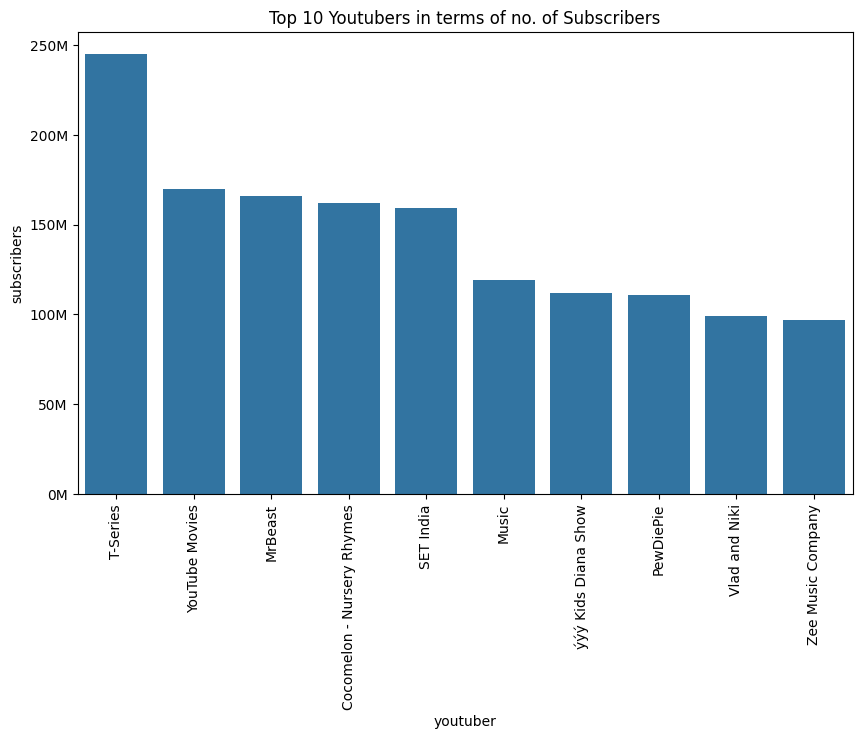

In [204]:
plt.figure(figsize=(10,6))
ax=sns.barplot(y='subscribers',x='youtuber', data=youtube_df,order=youtube_df.sort_values('subscribers',ascending=False).youtuber.iloc[:10])
plt.xticks(rotation=90)
ax.set_yticklabels([f'{int(label/1e6)}M' for label in ax.get_yticks()])
plt.title('Top 10 Youtubers in terms of no. of Subscribers')

In [205]:
youtube_df.head(10)

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment (%),population,unemployment_rate,urban_population,latitude,longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


### Top 10 YouTubers in terms of Views

C:\Users\janam\AppData\Local\Temp\ipykernel_23908\206788327.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1e9)}B' for label in ax.get_yticks()])


Text(0.5, 1.0, 'Top 10 Youtubers in terms of Views')

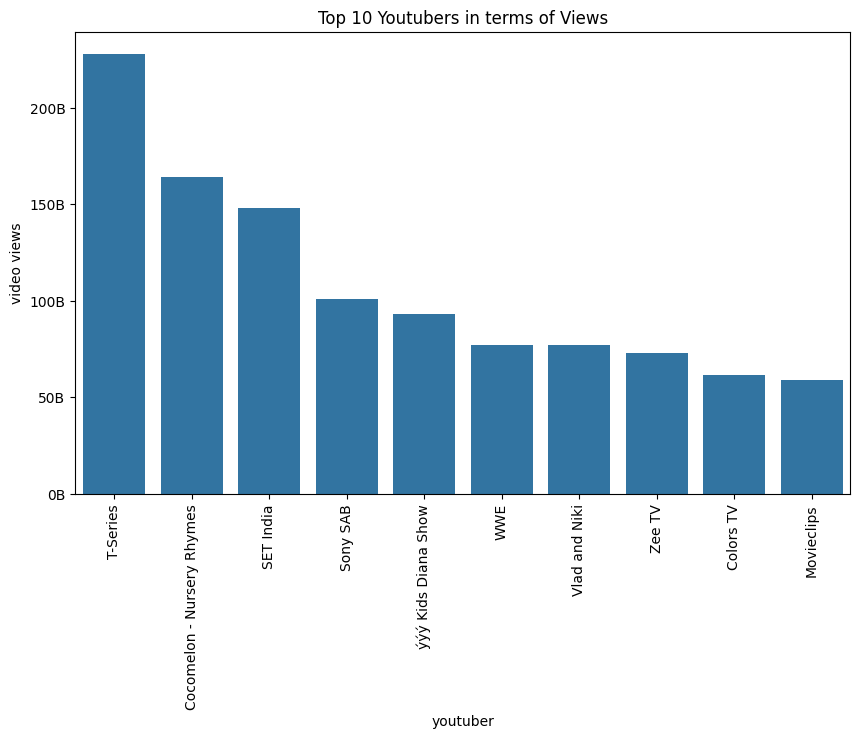

In [206]:
plt.figure(figsize=(10,6))
ax=sns.barplot(y='video views', x='youtuber',data=youtube_df,order=youtube_df.sort_values('video views', ascending=False).youtuber.iloc[:10])
plt.xticks(rotation=90)
ax.set_yticklabels([f'{int(label/1e9)}B' for label in ax.get_yticks()])
plt.title('Top 10 Youtubers in terms of Views')

### Top 10 YouTube Channels in terms of Uploads

Text(0.5, 1.0, 'Top 10 Youtubers in terms of Uploads')

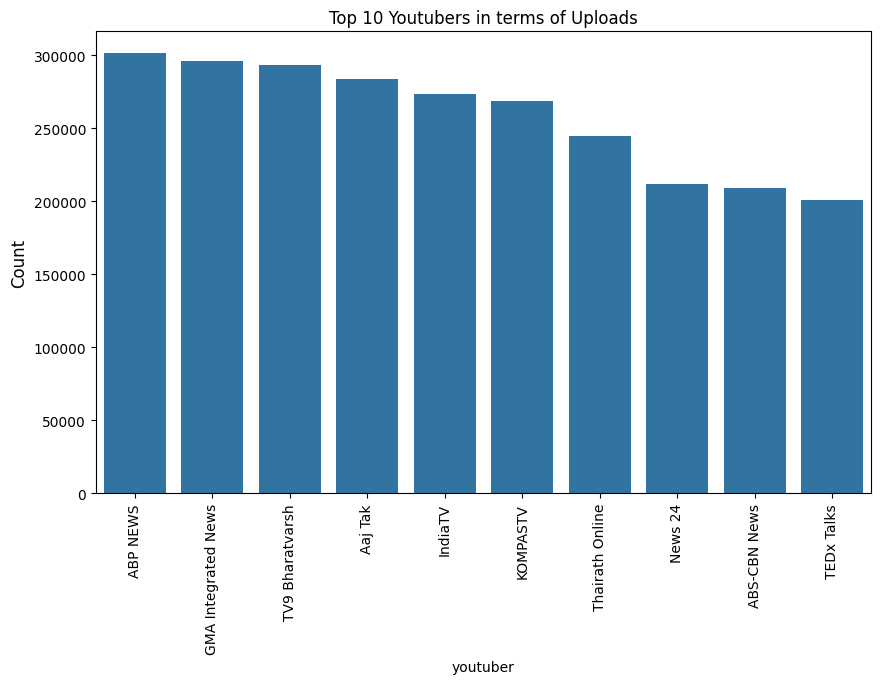

In [207]:
plt.figure(figsize=(10,6))
ax=sns.barplot(y='uploads', x='youtuber',data=youtube_df,order=youtube_df.sort_values('uploads', ascending=False).youtuber.iloc[:10])
plt.xticks(rotation=90)
plt.ylabel('Count', size=12)
plt.title('Top 10 Youtubers in terms of Uploads')

In [208]:
sorted_df = youtube_df.sort_values(by='uploads', ascending=False)
sorted_df.head(10)

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment (%),population,unemployment_rate,urban_population,latitude,longitude
95,96,ABP NEWS,37000000,1.310261e+10,People & Blogs,ABP NEWS,301308,India,IN,News,...,400000.0,2012.0,Jun,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
857,858,GMA Integrated News,13400000,9.569815e+09,News & Politics,GMA Integrated News,296272,Philippines,PH,News,...,100000.0,2007.0,Oct,29.0,35.5,1.081166e+08,2.15,50975903.0,12.879721,121.774017
747,748,TV9 Bharatvarsh,14500000,1.030352e+10,People & Blogs,TV9 Bharatvarsh,293516,India,IN,News,...,700000.0,2018.0,Nov,19.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
33,34,Aaj Tak,57600000,2.530775e+10,News & Politics,Aaj Tak,283775,India,IN,News,...,500000.0,2009.0,Aug,27.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
107,108,IndiaTV,35500000,1.610502e+10,News & Politics,IndiaTV,273255,India,IN,News,...,600000.0,2006.0,Aug,26.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
689,690,KOMPASTV,15000000,1.182731e+10,News & Politics,KOMPASTV,269050,Indonesia,ID,News,...,100000.0,2013.0,Aug,23.0,36.3,2.702039e+08,4.69,151509724.0,-0.789275,113.921327
586,587,Thairath Online,16200000,1.456384e+10,News & Politics,Thairath Online,244899,Thailand,TH,News,...,100000.0,2010.0,Sep,27.0,49.3,6.962558e+07,0.75,35294600.0,15.870032,100.992541
502,503,News 24,17700000,8.396876e+09,News & Politics,24 ï¿½ï¿½ï¿½ï,211620,Ukraine,UA,News,...,230000.0,2006.0,Feb,5.0,82.7,4.438516e+07,8.88,30835699.0,48.379433,31.165580
673,674,ABS-CBN News,15100000,1.048937e+10,News & Politics,ABS-CBN News,209520,Philippines,PH,News,...,100000.0,2009.0,Oct,22.0,35.5,1.081166e+08,2.15,50975903.0,12.879721,121.774017
84,85,TEDx Talks,38600000,7.339333e+09,Nonprofits & Activism,TEDx Talks,200933,United States,US,Nonprofit,...,100000.0,2009.0,Jun,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


### Average Subscribers per Category

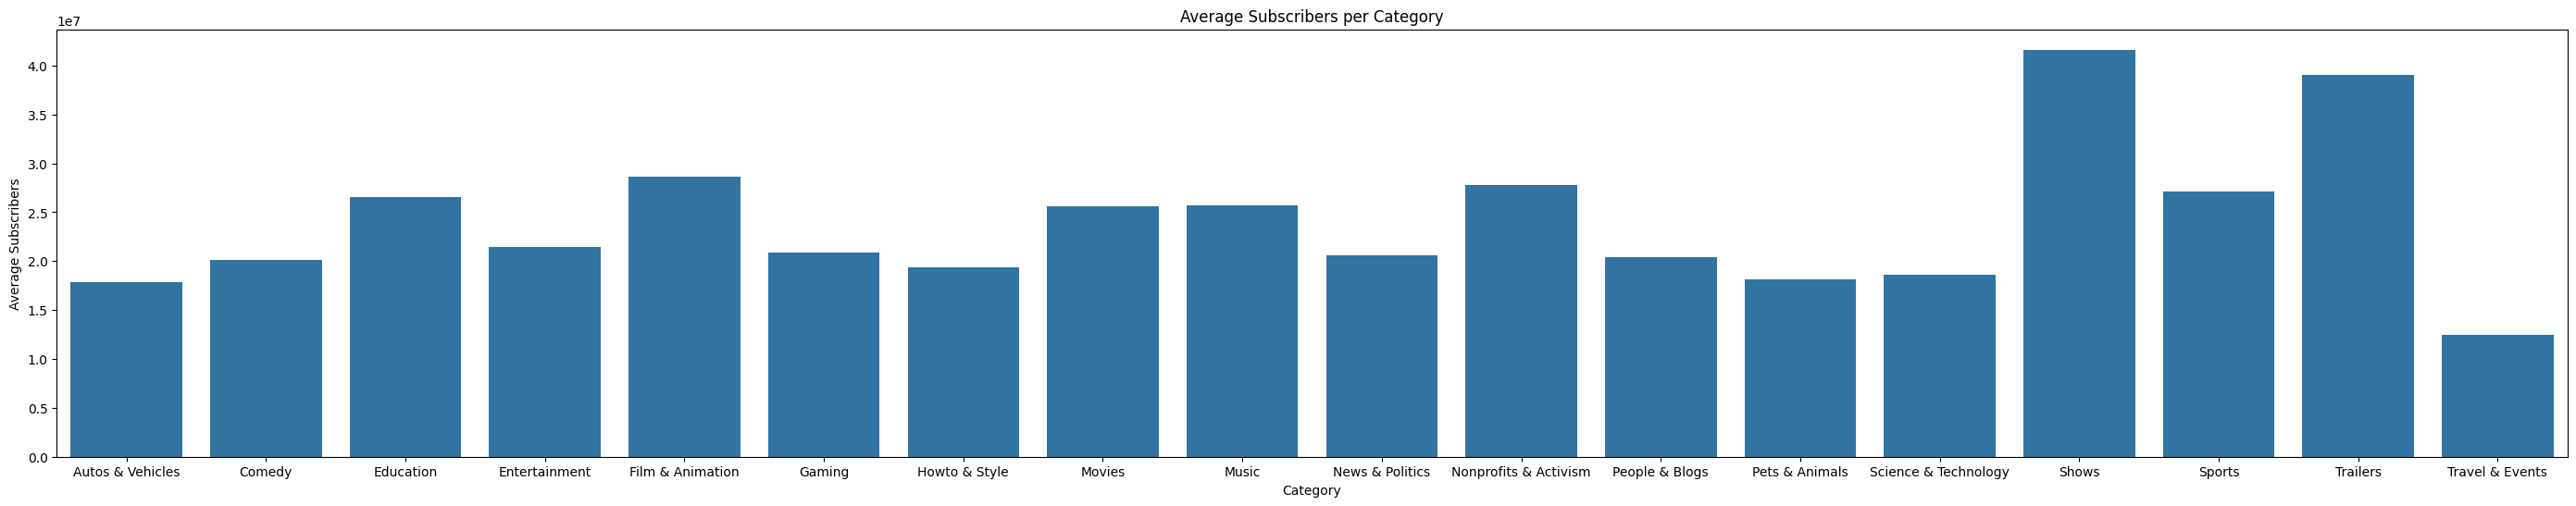

In [209]:
average_subscribers_per_category = youtube_df.groupby('category')['subscribers'].mean().reset_index()

plt.figure(figsize=(35, 6))
sns.barplot(x='category', y='subscribers', data=average_subscribers_per_category)
plt.title('Average Subscribers per Category')
plt.xlabel('Category')
plt.ylabel('Average Subscribers')
plt.show()

### Number of YouTube Channels per Country

C:\Users\janam\AppData\Local\Temp\ipykernel_23908\349883389.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(youtube_df['country'].value_counts(ascending=False).index), rotation=90)


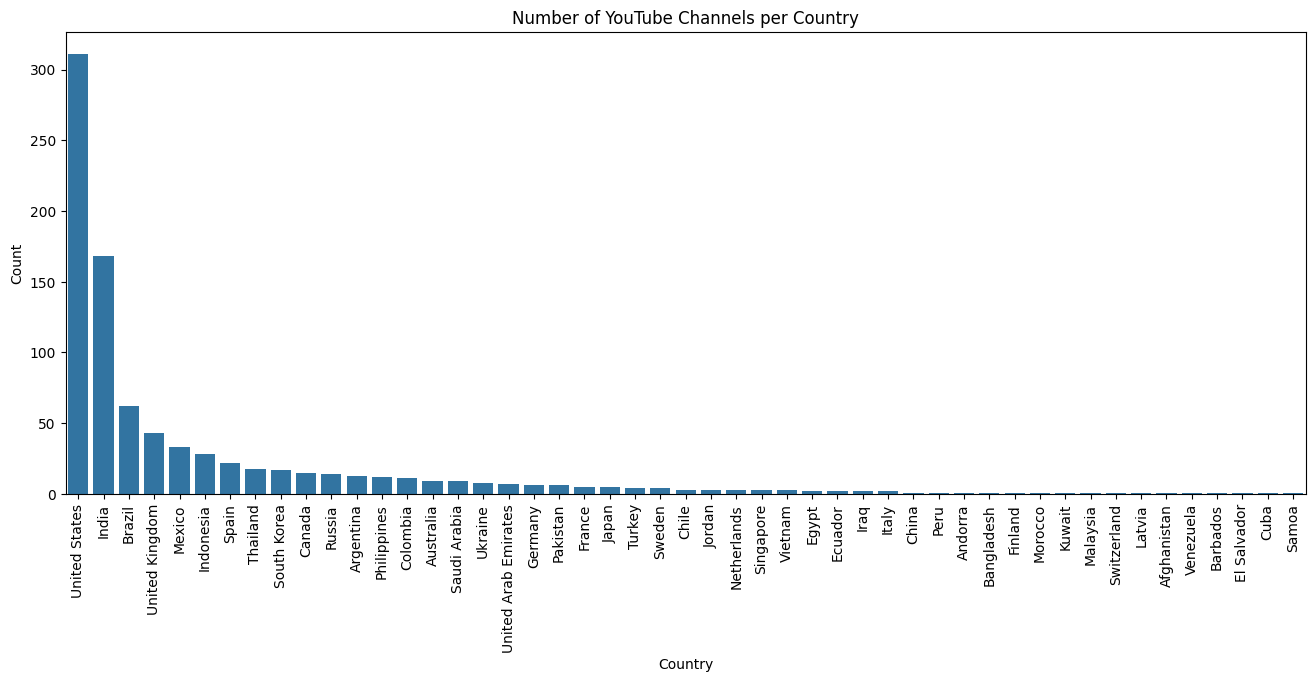

In [210]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.countplot(x='country', data=youtube_df, order=youtube_df['country'].value_counts(ascending=False).index, ax=ax)
ax.set_xticklabels(list(youtube_df['country'].value_counts(ascending=False).index), rotation=90)
ax.set_title('Number of YouTube Channels per Country')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

plt.show()

&nbsp;<br>

### Insights

- T-Series has the highest number of subscribers and views as well. In terms of views, the gap from the next channel is huge. 

- The highest category is Entertainment, followed by Music, then People and Vlogs. In the top 2, the most common was the category Entertainment, having 2/10. On the other hand, the bottom categories are Travel & Events and Trailers. These 2 categories aren't found in the Top 10.

- United States is found to have the highest count in terms of YouTube channels. 

- Most of the Top 10 Channels in terms of uploads seems to be in the People & Blogs and News & Politics category. Additionally, majority of them are from Asia. 

## Research Question

With the analysis found above, the group has decided to dive into the question __'How do various factors, including the type of YouTube channel, location, and others, influence the success of YouTube channels, and is there a specific behavior of these successful YouTube channels?'__

Answering this question can greatly help upcoming YouTubers strategize their way up the rank. Channels like T-Series is seen to have the highest number of subscribers, with a large gap between its competitors. By analayzing the different success factors of YouTube channels, creators can enhance their own strategies. 

Additionally, recognizing most and least common categories may allow creators to adapt to popular categories. Being informed on the most popular categories can help channels stay relevant and competitive. On the other hand, creating a specific niche can help foster a community than can help them grow into a much more successful channel. 

&nbsp;<br>

# Phase 2

## Data Modelling

### Association Rule Mining

Association Rule Mining was done here in order to gather more relationships.

In [211]:
from scipy.stats import percentileofscore
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Calculate percentiles for each ranking
percentiles = youtube_df['rank'].apply(lambda x: percentileofscore(youtube_df['rank'], x, kind='rank'))

# Define percentile ranges for high, medium, and low
high_range = (0, 25)
medium_range = (25, 75)
low_range = (75, 100)

# Categorize rankings based on percentiles
categories = pd.cut(percentiles, bins=[high_range[0], medium_range[0], medium_range[1], low_range[1]],
                    labels=['High', 'Medium', 'Low'])

# Add the 'rank_category' column to youtube_df
youtube_df['rank_category'] = categories
youtube_df.head()


,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,created_year,created_month,created_date,gross_tertiary_education_enrollment (%),population,unemployment_rate,urban_population,latitude,longitude,rank_category
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,High
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,High
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,High
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,High
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,High


In [212]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

dataset = youtube_df[['category', 'country', 'rank_category']]
one_hot_encoded = pd.get_dummies(dataset, columns=['category', 'country', 'rank_category'])

apriori_result = apriori(one_hot_encoded, min_support=0.75, use_colnames=True)
apriori_result


,support,itemsets


The code segment above gets the category, country, and rank_category of the specific YouTube channel. The data is then one-hot-encoded and passed into a rule mining algorithm called Apriori. Using a support of 0.75, no rules were discovered. Let us look into that:

In [213]:
apriori_result = apriori(one_hot_encoded, min_support=0.1, use_colnames=True)
apriori_result

,support,itemsets
0,0.241658,(category_Entertainment)
1,0.204247,(category_Music)
2,0.131446,(category_People & Blogs)
3,0.169869,(country_India)
4,0.314459,(country_United States)
5,0.249747,(rank_category_High)
6,0.499494,(rank_category_Medium)
7,0.250758,(rank_category_Low)
8,0.130435,"(category_Entertainment, rank_category_Medium)"
9,0.169869,"(country_United States, rank_category_Medium)"


Looking into the rules generated with a minimum support of 0.1 there were 9 rules generated. The returned itemsets will be listed in a more readable format below.

1. category_Entertainment
2. category_Music
3. category_People & Blogs
4. country_India
5. country_United States
6. rank_category_High
7. rank_category_Medium
8. rank_category_Low
9. rank_category_Medium, category_Entertainment
10. rank_category_Medium, country_United States

In [214]:
association_rules(apriori_result, metric="confidence", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(category_Entertainment),(rank_category_Medium),0.241658,0.499494,0.130435,0.539749,1.080591,0.009728,1.087462,0.098346
1,(country_United States),(rank_category_Medium),0.314459,0.499494,0.169869,0.540193,1.081479,0.012798,1.088512,0.109900


After getting the association rules, using a confidence of 50% two rules were generated. 

1. category_Entertainment -> rank_category_Medium
2. country_United States -> rank_category_Medium

#### channel_type and country

With channel_type and country having a dependency on each other, their relationship with success could be investigated. Association rule mining was used to get frequent patterns in the data set.

With this data mining technique, a successful YouYuber would be defined as belonging to the top 10% of rankings.

The YouTubers are binned based on their rank. The top 10% are categorized as successful while the others are categorized as failed.

The threshold used are as follows:
- Support threshold: The itemset must appear atleast 10% in the data
- Confidence threshold: 60%

In [215]:
from mlxtend.frequent_patterns import fpgrowth

# Categorize rankings based on percentiles
# top n%
n = .10
categories = pd.qcut(youtube_df['rank'], [0, n, 1],
                    labels=['Success', 'Fail'])

# Add the 'rank_category' column to youtube_df
youtube_df['rank_category'] = categories
youtube_df[['rank', 'channel_type']]
# --

dataset = youtube_df[['channel_type', 'country', 'rank_category']].dropna().values.tolist()
dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df
frequent_itemsets = fpgrowth(df, min_support=0.1, use_colnames=True)

frequent_itemsets


association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)[['antecedents', 'consequents']]



,antecedents,consequents
0,(Music),(Fail)
1,(India),(Fail)
2,(United States),(Fail)
3,(Entertainment),(Fail)
4,"(United States, Entertainment)",(Fail)


There is 1 rule that has a channel_type and country which is the United States and Entertainment. It's findings is that if a YouTuber is in the United States and their channel_type is entertainment, they are likely not going to be in the top 10% of youtubers.

#### Highest monthly earnings with channel type

Since the highest monthly earnings and the lowest monthly earnings have the same order, the highest monthly earnings would be the only one being considered for this data mining.

Association rule mining was still used to discover relationship on which channel type is most likely to earn high and low income.

For our definition of high income, it is the top 40% of the youtubers while the rest is considered as low income. These incomes are binned.

The threshold used are as follows:
- Support threshold: Since the count of Autos and Nonprofits are too low, they would not be counted in the support threshold. The lowest frequency of a channel_type would be Sports. Since this has a frequency of 13 and we would want to know if it has an association, 13 was placed as the minimum support threshold.
- Confidence threshold: 60%



In [216]:
# Categorize rankings based on percentiles
from assoc_miner import RuleMiner
from pprint import pprint

n = .60
categories = pd.qcut(youtube_df['highest_monthly_earnings'], [0, n, 1], labels=['low_income', 'high_income'])

# Add the 'rank_category' column to youtube_df
youtube_df['monthly_earnings_category'] = categories
youtube_df[['channel_type', 'highest_monthly_earnings', 'monthly_earnings_category']].sort_values(by='highest_monthly_earnings', ascending=False)
print(youtube_df['channel_type'].value_counts())
# --

dataset = youtube_df[['channel_type', 'monthly_earnings_category']].dropna().values.tolist()
dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

# 13 as threshold
miner = RuleMiner(13, .6)
pprint(miner.get_association_rules(df))

# percentage as threshold
# frequent_itemsets = fpgrowth(df, min_support=0.1, use_colnames=True)
# frequent_itemsets
# association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)[['antecedents', 'consequents']]

channel_type
Entertainment    300
Music            216
People            99
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64
[[['Comedy'], ['low_income']],
 [['Comedy'], ['low_income']],
 [['Entertainment'], ['low_income']],
 [['Entertainment'], ['low_income']],
 [['Games'], ['low_income']],
 [['Games'], ['low_income']],
 [['Howto'], ['low_income']],
 [['Howto'], ['low_income']],
 [['News'], ['high_income']],
 [['News'], ['high_income']],
 [['People'], ['low_income']],
 [['People'], ['low_income']]]


We can see from the results that if a channel type is of News, it is more likely to belong to the Top 40% of earners in YouTube while Comedy, Entertainment, Games, HowTo, and People are likely to belong to the 60% and below of earners. 

## Statistical Inference

### Is there a significant correlation between video_views and amount of subscribers of a channel?

__Step 0: Variables:__
    `video views` (QN, X)
    `subscribers` (QN, Y)

__Step 1: Claim__
H<sub>0</sub>: There is no significant linear correlation between `video_views` and amount of `subscibers` of a channel.
H<sub>0</sub>: ρ = 0

H<sub>A</sub>: There is a significant linear correlation between `video_views` and amount of `subscibers` of a channel.
H<sub>A</sub>: ρ ≠ 0

__Step 2: Type of Test__
Pearson's Correlation Test

__Step 3: Level of Significance__
 α = 0.5 or 5%

__Step 4: Test Statistics__


Pearson's correlation coefficient: 0.7442143472470255
P-value: 3.5403311532320036e-175


<Axes: xlabel='video views', ylabel='subscribers'>

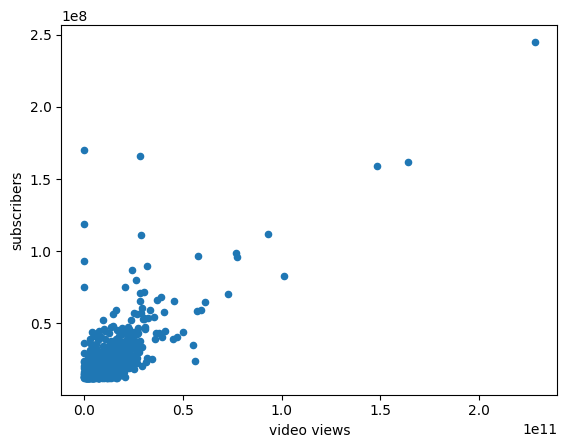

In [217]:
# Check the correlation coefficient and p-value
corr_video_views_subscribers, p_value = stats.pearsonr(youtube_df['video views'], youtube_df['subscribers'])

print(f"Pearson's correlation coefficient: {corr_video_views_subscribers}")
print(f"P-value: {p_value}")

video_views_subscribers_df = youtube_df[['video views', 'subscribers']]
video_views_subscribers_df.plot.scatter('video views', 'subscribers')

__Step 5: Decision__

Using the Pearson's Correlation Coefficient, the p-value is 3.5403 e-175.
Using the significance level 0.05, the p-value 3.5403 e-175 is statistically insignificant.
Since the p-value is less than the significance value, reject the null hypothesis.
__Thus, the data provides strong evidence that there is a significant linear correlation with `video views` and `subscribers` at a significance level of 5%, also having a strong positive linear relation between `video views` and `subscribers` (0.7442).__


&nbsp;<br>

### What are the most common channel_type, and do they tend to have more subscribers?

We can frame this questions with:
__Is there a correlation between the frequency of `channel_type` and the central (mean/median) number of subscribers per `channel_type`.__

**Step 0: Variables**
`channel_type_frequency` (QN) - the frequency of each `channel_type` in the sample. Feature engineered
`median_sub_channel` (QN) - the median of all unique `channel_type`. Feature engineered

__Step 1: Claim__
H<sub>0</sub>: There is no significant linear correlation between `channel_type_frequency` and amount of `median_sub_channel` of a channel.
H<sub>0</sub>: ρ = 0

H<sub>A</sub>: There is a significant linear correlation between `channel_type_frequency` and amount of `median_sub_channel` of a channel.
H<sub>A</sub>: ρ ≠ 0

__Step 2: Type of Test__
Pearson's Correlation Test

__Step 3: Level of Significance__
 α = 0.5 or 5%

__Step 4: Test Statistics__

In [218]:
# Let us first determine the frequency of each channel type
types = youtube_df['channel_type'].value_counts()
types_df = types.reset_index()
types_df.columns = ['channel_type', 'frequency']
print(types_df)

     channel_type  frequency
0   Entertainment        300
1           Music        216
2          People         99
3           Games         98
4          Comedy         51
5       Education         49
6            Film         42
7           Howto         36
8            News         30
9            Tech         17
10         Sports         13
11          Autos          3
12        Animals          3
13      Nonprofit          2


(array([190.,  62.,  26.,  11.,   1.,   0.,   2.,   2.,   1.,   0.,   1.,
          2.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([1.23000000e+07, 2.08388889e+07, 2.93777778e+07, 3.79166667e+07,
        4.64555556e+07, 5.49944444e+07, 6.35333333e+07, 7.20722222e+07,
        8.06111111e+07, 8.91500000e+07, 9.76888889e+07, 1.06227778e+08,
        1.14766667e+08, 1.23305556e+08, 1.31844444e+08, 1.40383333e+08,
        1.48922222e+08, 1.57461111e+08, 1.66000000e+08]),
 <BarContainer object of 18 artists>)

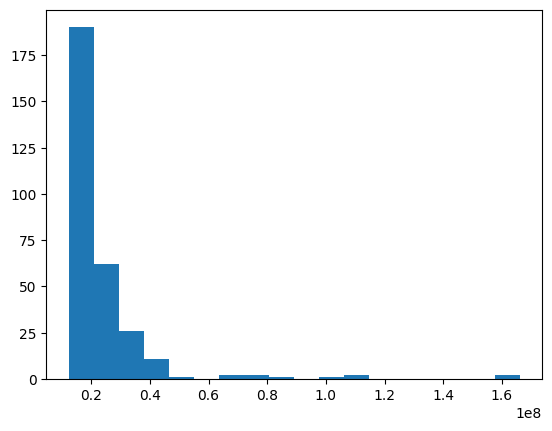

In [219]:
# To determine whether or not to use mean or median, let us visualize the distribution of the number 
# of subscribers for 1 channel_type, Entertainment
plt.hist(youtube_df[youtube_df['channel_type'] == 'Entertainment']['subscribers'], bins=18)

In [220]:
# We can see that there are outliers in our data. The best representation that we can use is 
# median per channel_type
median_agg_sub = youtube_df.groupby('channel_type').agg({'subscribers': ['median']})
median_agg_sub

,subscribers
,median
channel_type,
Animals,20900000.0
Autos,14900000.0
Comedy,18600000.0
Education,18800000.0
Entertainment,17900000.0
Film,19600000.0
Games,16450000.0
Howto,15550000.0


In [221]:
# Let us merge the 2 data into dataframe
merged_df = pd.merge(types_df, median_agg_sub['subscribers'], on='channel_type')
print(merged_df)

# merged_df.plot.bar()

     channel_type  frequency      median
0   Entertainment        300  17900000.0
1           Music        216  19950000.0
2          People         99  16600000.0
3           Games         98  16450000.0
4          Comedy         51  18600000.0
5       Education         49  18800000.0
6            Film         42  19600000.0
7           Howto         36  15550000.0
8            News         30  16350000.0
9            Tech         17  17300000.0
10         Sports         13  16400000.0
11          Autos          3  14900000.0
12        Animals          3  20900000.0
13      Nonprofit          2  27750000.0


<Axes: xlabel='frequency', ylabel='median'>

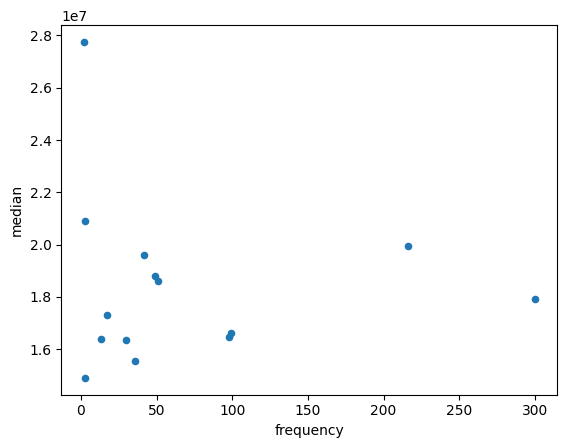

In [222]:
merged_df.plot.scatter('frequency', 'median')

In [223]:
# We will now be checking the correlation and p-value
corr_freq_subscribers, p_value = stats.pearsonr(merged_df['frequency'], merged_df['median'])

print(f"Pearson's correlation coefficient: {corr_freq_subscribers}")
print(f"P-value: {p_value}")

Pearson's correlation coefficient: -0.07081502470098233
P-value: 0.809894113630808


__Step 5: Decision__

Using the Pearson's Correlation Coefficient, the p-value is 0.8099
With the significance level of 0.05 and the p-value of 0.8099, we will be accepting the null hypothesis. Hence, there is no significant correlation between channel type and subscribers. 



&nbsp;<br>

### Is there a correlation between channel_type and lowest_monthly_earnings or highest_monthly_earnings?

We must first split this question into 2 separate ones:

1. Is the `lowest_monthly_earnings` dependent on the `channel_type`?
2. Is the `highest_monthly_earnings` dependent on the `channel_type`?

#### Is the `lowest_monthly_earnings` dependent on the channel_type?

**Step 0: Variables**
`channel_type` (QL)
`lowest_monthly_earnings` (QN)
`highest_monthly_earninigs` (QN)
`bins`(QN) - bins the earnings based on a quantile value. feature engineered

Let us start with the first question:

**Step 1: Claim**
H<sub>0</sub>: The `lowest_monthly_earnings` is independent on the `channel_type`

H<sub>A</sub>: The `lowest_monthly_earnings` is dependent on the `channel_type`

**Step 3: Level of Significance**
 α = 0.05 or 5%

**Step 4: Test Statistics**

In [224]:
# Create temporary dataframe with channel_type and lowest_monthly_earnings
l_monthly_table = youtube_df[['channel_type', 'lowest_monthly_earnings', 'highest_monthly_earnings']].copy()

# DATA CLEANING: Dropping default values
l_monthly_table.drop(l_monthly_table.query('lowest_monthly_earnings < 1 and highest_monthly_earnings < 1').index, inplace=True)

# Bin the values based on quantile ranges having 0-33 quantile range as low, 34-66 as mid, 67 to 100 as high
l_monthly_table['bins'] = pd.qcut(youtube_df['lowest_monthly_earnings'], [0, 0.33, 0.66, 1], labels=['low_income', 'mid_income', 'high_income'])

# Create the contingency table
contingency_table = pd.crosstab(index=l_monthly_table['bins'], columns=l_monthly_table['channel_type'])
# contingency_table.drop(columns='Unknown', inplace=True)

# putting insiginifact channel_type in the others column
omit_list = ['Animals', 'Autos', 'Nonprofit', 'Sports', 'Tech']
others = contingency_table.loc[:, omit_list].sum(axis='columns')
contingency_table.drop(columns=omit_list, inplace=True)
contingency_table = pd.concat([contingency_table, others.rename('Others')], axis='columns')
print(contingency_table)

result = stats.chi2_contingency(contingency_table)
print(result)
print(f'Statistic: {result[0]}')
print(f'p-value: {result[1]}')


             Comedy  Education  Entertainment  Film  Games  Howto  Music  \
bins                                                                       
low_income       10          5             72     3     23     15     20   
mid_income       20         18             94    16     39     17     89   
high_income      15         25            109    16     16      4     88   

             News  People  Others  
bins                               
low_income      3      24       9  
mid_income      7      13      13  
high_income    19      33      11  
Chi2ContingencyResult(statistic=77.61312488706888, pvalue=2.2342071656651847e-09, dof=18, expected_freq=array([[  9.78723404,  10.43971631,  59.8108747 ,   7.61229314,
         16.96453901,   7.82978723,  42.8463357 ,   6.30732861,
         15.22458629,   7.17730496],
       [ 17.34042553,  18.4964539 , 105.96926714,  13.48699764,
         30.05673759,  13.87234043,  75.91252955,  11.1749409 ,
         26.97399527,  12.71631206],
     

__Step 5: Decision__ 

With the p-value lower than 0.05, we will be rejecting the null hypothesis.
__We can statistically say that the lowest_monthly_earnings is dependent on the channel_type.__


#### Is the `highest_monthly_earnings` dependent on the channel_type?

**Step 0: Variables**
`channel_type` (QL)
`lowest_monthly_earnings` (QN)
`highest_monthly_earninigs` (QN)
`bins`(QN) - bins the earnings based on a quantile value. feature engineered

Let us start with the first question:

**Step 1: Claim**
H<sub>0</sub>: The `highest_monthly_earnings` is independent on the `channel_type`

H<sub>A</sub>: The `highest_monthly_earnings` is dependent on the `channel_type`

**Step 3: Level of Significance**
 α = 0.05 or 5%

**Step 4: Test Statistics**

In [225]:
# Create temporary dataframe with channel_type and lowest_monthly_earnings
l_monthly_table = youtube_df[['channel_type', 'lowest_monthly_earnings', 'highest_monthly_earnings']].copy()

# DATA CLEANING: Dropping default values
l_monthly_table.drop(l_monthly_table.query('lowest_monthly_earnings < 1 and highest_monthly_earnings < 1').index, inplace=True)

# Bin the values based on quantile ranges having 0-33 quantile range as low, 34-66 as mid, 67 to 100 as high
l_monthly_table['bins'] = pd.qcut(youtube_df['highest_monthly_earnings'], [0, 0.33, 0.66, 1], labels=['low_income', 'mid_income', 'high_income'])

# Create the contingency table
contingency_table = pd.crosstab(index=l_monthly_table['bins'], columns=l_monthly_table['channel_type'])
# contingency_table.drop(columns='Unknown', inplace=True)

# putting insiginifact channel_type in the others column
omit_list = ['Animals', 'Autos', 'Nonprofit', 'Sports', 'Tech']
others = contingency_table.loc[:, omit_list].sum(axis='columns')
contingency_table.drop(columns=omit_list, inplace=True)
contingency_table = pd.concat([contingency_table, others.rename('Others')], axis='columns')
print(contingency_table)

result = stats.chi2_contingency(contingency_table)
print(result)
print(f'Statistic: {result[0]}')
print(f'p-value: {result[1]}')


             Comedy  Education  Entertainment  Film  Games  Howto  Music  \
bins                                                                       
low_income       10          5             72     3     23     15     20   
mid_income       20         18             94    16     39     17     89   
high_income      15         25            109    16     16      4     88   

             News  People  Others  
bins                               
low_income      3      24       9  
mid_income      7      13      13  
high_income    19      33      11  
Chi2ContingencyResult(statistic=77.61312488706888, pvalue=2.2342071656651847e-09, dof=18, expected_freq=array([[  9.78723404,  10.43971631,  59.8108747 ,   7.61229314,
         16.96453901,   7.82978723,  42.8463357 ,   6.30732861,
         15.22458629,   7.17730496],
       [ 17.34042553,  18.4964539 , 105.96926714,  13.48699764,
         30.05673759,  13.87234043,  75.91252955,  11.1749409 ,
         26.97399527,  12.71631206],
     

__Step 5: Decision__ 
With the p-value lower than 0.05, we will be rejecting the null hypothesis.
We can statistically say that the lowest_monthly_earnings is dependent on the channel_type.

We can see that the highest_monthly_earnings and the lowest_monthly_earnings are exactly the same. It would not matter if we were to use lowest_monthly_earnings or highest_monthly_earnings when we are using the monthly earnings a a metric.

__With that being said, it is safe to assume that earnings is dependent on the channel type__


&nbsp;<br>

### Do individual countries have a popular channel_type?

#### Is the `highest_monthly_earnings` dependent on the `channel_type`?

**Step 1: Claim**
H<sub>0</sub>: The `highest_monthly_earnings` is independent on the `channel_type`

H<sub>A</sub>: The `highest_monthly_earnings` is dependent on the `channel_type`

__Step 2: Type of Test__
Chi-Square Test of Independence

**Step 3: Level of Significance**
 α = 0.5 or 5%

**Step 4: Test Statistics**


This is a multi-phased question. Let us break it down first.
1. We have to determine whether the count of channel type is dependent on a country
We can get the answer for this using the chi-squared test

2. Which ones are the most popular channel type in each country
We can get the answer from statistical inference from the Chi-Square test. If the variables are independent, we can say that the countries do not have any effect on the number of a specific `channel_type` it has.

**Step 0: Variables**
`channel_type` QL
`country` QL

Let us start with the first question:

**Step 1: Claim**
H<sub>0</sub>: The number of each `channel_type` is independent on the `country`

H<sub>A</sub>: The number of each `channel_type` is dependent on the `country`

__Step 2: Type of Test__
Chi-Square test of independence

**Step 3: Level of Significance**
 α = 0.5 or 5%

**Step 4: Test Statistics**

In [226]:
# creating the contingency table
contingency_table = pd.crosstab(index=youtube_df['channel_type'], columns=youtube_df['country'])
# contingency_table.drop(columns='Unknown', inplace=True)
# contingency_table.drop(index='Unknown', inplace=True)
# putting insiginifact countries in the others column
omit_list = contingency_table.sum(axis='index')[contingency_table.sum(axis='index') < 167]
# print(omit_list.index.to_list())
others = contingency_table.loc[:, omit_list.index.to_list()].sum(axis='columns')
contingency_table.drop(columns=omit_list.index.to_list(), inplace=True)
contingency_table = pd.concat([contingency_table, others.rename('others')], axis='columns')
print(contingency_table)

print(contingency_table.sum(axis='index'))


result = stats.chi2_contingency(contingency_table)
# print(f'Statistic: {result[0]}')
# print(f'p-value: {result[1]}')
print(result)


               United States  others
channel_type                        
Animals                    3       0
Autos                      0       2
Comedy                    16      32
Education                 18      29
Entertainment            106     180
Film                      11      24
Games                     26      60
Howto                     12      20
Music                     81     115
News                       3      26
Nonprofit                  1       1
People                    24      45
Sports                     6       6
Tech                       4      11
United States    311
others           551
dtype: int64
Chi2ContingencyResult(statistic=20.922977791429854, pvalue=0.07446606759785887, dof=13, expected_freq=array([[  1.08236659,   1.91763341],
       [  0.72157773,   1.27842227],
       [ 17.31786543,  30.68213457],
       [ 16.95707657,  30.04292343],
       [103.18561485, 182.81438515],
       [ 12.62761021,  22.37238979],
       [ 31.02784223,  54.972

Upon inspection of the contingency table, we see that the majority of the expected values do not reach the minimum of 5. Even with other countries put as others, the minimum expected frequency is 0.72. Because of this, we cannot conclude if a specific country has a favorite channel type using the chi-square test.

&nbsp;<br>

### Is there a significant correlation between rank and video views?

__Step 0: Variables:__
    `rank` (QN, X)
    `video views` (QN, Y)

__Step 1: Claim__
H<sub>0</sub>: There is no significant linear correlation between `rank` and amount of `video views` of a channel.
H<sub>0</sub>: ρ = 0

H<sub>A</sub>: There is a significant linear correlation between `rank` and amount of `video views` of a channel.
H<sub>A</sub>: ρ ≠ 0

__Step 2: Type of Test__
Pearson's Correlation Test

__Step 3: Level of Significance__
 α = 0.5 or 5%

__Step 4: Test Statistics__


Pearson's correlation coefficient: -0.4513167651433205
P-value: 8.578192168846848e-51


<Axes: xlabel='rank', ylabel='video views'>

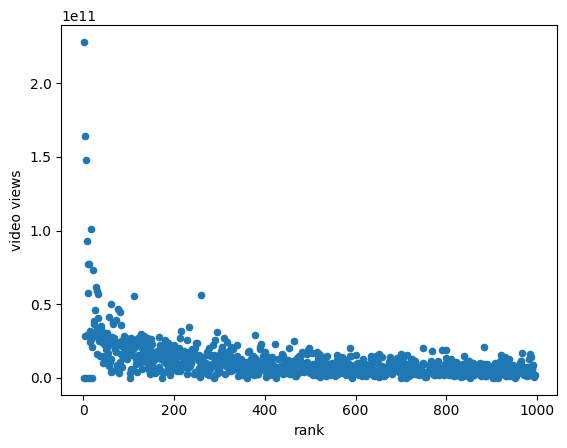

In [227]:
# Check the correlation coefficient and p-value
corr_rank_video_views, p_value = stats.pearsonr(youtube_df['rank'], youtube_df['video views'])

print(f"Pearson's correlation coefficient: {corr_rank_video_views}")
print(f"P-value: {p_value}")

corr_rank_video_views_df = youtube_df[['rank', 'video views']]
corr_rank_video_views_df.plot.scatter('rank', 'video views')

__Step 5: Decision__

Using the Pearson's Correlation Coefficient, the p-value associated is 8.5782e-51
Comparing this with the significance level 0.05, the p-value 8.57829e-51 is statistically insignificant.
Since the p-value is less than the significance value, we reject the null hypothesis.
__Thus, the data provides strong evidence that there is a significant linear correlation with `video views` and `rank` at a significance level of 5%. With the Pearson's correlation coefficient, the two are found to have a negative moderate linear relation (-0.4513).__

&nbsp;<br>

### Is there a significant correlation between the number of uploads, and number of subscribers

__Step 0: Variables:__
    `uploads` (QN, X)
    `subscribers` (QN, Y)

__Step 1: Claim__
H<sub>0</sub>: There is no significant linear correlation between `uploads` and amount of `subscribers` of a channel.
H<sub>0</sub>: ρ = 0

H<sub>A</sub>: There is a significant linear correlation between `uploads` and amount of `subscribers` of a channel.
H<sub>A</sub>: ρ ≠ 0

__Step 2: Type of Test__
Pearson's Correlation Test

__Step 3: Level of Significance__
 α = 0.05 or 5%

__Step 4: Test Statistics__


Pearson's correlation coefficient: 0.07889807801956045
P-value: 0.013066635090205657


<Axes: xlabel='uploads', ylabel='subscribers'>

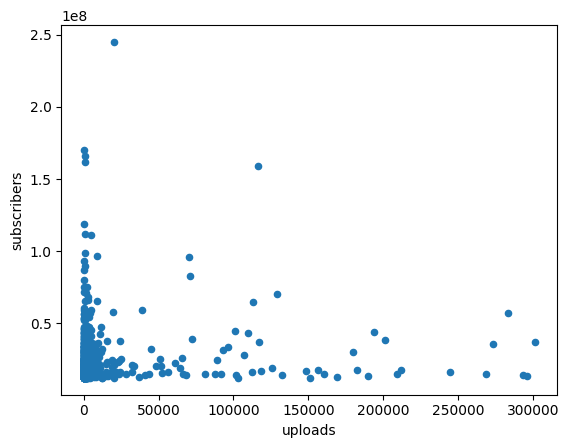

In [228]:
# Check the correlation coefficient and p-value
corr_uploads_subscribers, p_value = stats.pearsonr(youtube_df['uploads'], youtube_df['subscribers'])

print(f"Pearson's correlation coefficient: {corr_uploads_subscribers}")
print(f"P-value: {p_value}")

upload_subscribers_df = youtube_df[['uploads', 'subscribers']]
upload_subscribers_df.plot.scatter('uploads', 'subscribers')

__Step 5: Decision__

Using the Pearson's Correlation Coefficient, the p-value associated is 0.01306
Comparing this with the significance level 0.05, the p-value 0.01306 is statistically insignificant.
Since the p-value is less than the significance value, we reject the null hypothesis.
__Thus, the data provides strong evidence that there is a significant linear correlation with `uploads` and `subscribers` at a significance level of 5%. With the Pearson's correlation coefficient, the two are found to have a weak positive linear relation (0.0789).__

&nbsp;<br>

### Is the rank_category independent from the country of a channel? 

__Step 0: Variables:__
    `country` (QL, X)
    `rank_category` (QL, Y)

__Step 1: Claim__
H<sub>0</sub>: The channel's `country` and `rank_category` are independent of each other.
H<sub>A</sub>: The channel's `country` and `rank_category` are dependent on each other.

__Step 2: Type of Test__
Chi-Square Test of Independence

__Step 3: Level of Significance__
 α = 0.05 or 5%

__Step 4: Test Statistics__


In [229]:
contingency_table = pd.crosstab(index=youtube_df['rank_category'], columns=youtube_df['country'])
# contingency_table.drop(columns='Unknown', inplace=True)

# putting insiginifact countries in the others column
omit_list = contingency_table.sum(axis='index')[contingency_table.sum(axis='index') <= 43]
# print(omit_list.index.to_list())
others = contingency_table.loc[:, omit_list.index.to_list()].sum(axis='columns')
contingency_table.drop(columns=omit_list.index.to_list(), inplace=True)
contingency_table = pd.concat([contingency_table, others.rename('others')], axis='columns')
print(contingency_table)

print(contingency_table.sum(axis='index'))


result = stats.chi2_contingency(contingency_table)
print(result)

print(f'Statistic: {result[0]}')
print(f'p-value: {result[1]}')



               Brazil  India  United States  others
rank_category                                      
Success             6     25             30      27
Fail               56    143            281     301
Brazil            62
India            168
United States    311
others           328
dtype: int64
Chi2ContingencyResult(statistic=5.559132318581706, pvalue=0.13514431851387368, dof=3, expected_freq=array([[  6.27848101,  17.01265823,  31.49367089,  33.21518987],
       [ 55.72151899, 150.98734177, 279.50632911, 294.78481013]]))
Statistic: 5.559132318581706
p-value: 0.13514431851387368


__Step 5: Decision__ 
With the p-value higher than 0.05, we will be accepting the null hypothesis.
We can statistically say that the channel's rank_category and country are independent of each other.

### Is the channel type and rank_category dependent on each other?

__Step 0: Variables:__
    `channel_type` (QL, X)
    `rank_category` (QL, Y)

__Step 1: Claim__
H<sub>0</sub>: The channel's `channel_type` and `rank_category` are independent of each other.
H<sub>A</sub>: The channel's `channel_type` and `rank_category` are dependent on each other.

__Step 2: Type of Test__
Chi-Square Test of Independence

__Step 3: Level of Significance__
 α = 0.05 or 5%

__Step 4: Test Statistics__


Columns with cells that has an expected value lower than 5 is collapsed under the others column. With this, all cells have now 5 or more expected frequencies making a valid Chi-Squared Test.

In [230]:
contingency_table = pd.crosstab(index=youtube_df['rank_category'], columns=youtube_df['channel_type'])
# contingency_table.drop(columns='Unknown', inplace=True)

# putting insiginifact channel_type in the others column
omit_list = ['Animals', 'Autos', 'Tech', 'Nonprofit', 'Sports', 'News', 'Howto', 'Film']
others = contingency_table.loc[:, omit_list].sum(axis='columns')
contingency_table.drop(columns=omit_list, inplace=True)
contingency_table = pd.concat([contingency_table, others.rename('Others')], axis='columns')
print(contingency_table)

result = stats.chi2_contingency(contingency_table)
print(result)
print(f'Statistic: {result[0]}')
print(f'p-value: {result[1]}')

               Comedy  Education  Entertainment  Games  Music  People  Others
rank_category                                                                
Success             4          8             27      7     35       5      11
Fail               47         41            273     91    181      94     135
Chi2ContingencyResult(statistic=16.4016217990181, pvalue=0.011753180434314255, dof=6, expected_freq=array([[  5.15849844,   4.95620438,  30.34410845,   9.91240876,
         21.84775808,  10.01355579,  14.76746611],
       [ 45.84150156,  44.04379562, 269.65589155,  88.08759124,
        194.15224192,  88.98644421, 131.23253389]]))
Statistic: 16.4016217990181
p-value: 0.011753180434314255


__Step 5: Decision__ 
With the p-value lower than 0.05, we will be rejecting the null hypothesis.
We can statistically say that the channel's channel_type and rank_category are dependent on each other.

&nbsp;<br>

## Insights and Conclusions

After performing association rule mining and statistical inference, the following insights were gathered to help answer the question __'How do various factors, including the type of YouTube channel, location, and others, influence the success of YouTube channels, and is there a specific behavior of these successful YouTube channels?'__:

1. A strong positive linear correlation was established between video views and subscribers, further suggesting that channels with more views tend to have more subscribers.

2. There is a negative moderate correlation with video views and rank. This shows that as the number of the rank increases (1 to 1000) then the video views decreases and vice versa. This further suggests that high ranking channels receive high amount of video views.

4. A channel's rank and country is independent from each other. This means a country does not correspond a channel's ranking.

3. A weak linear correlation was found between subscribers and uploads.

4. There is no significant correlation between channel type frequency, and subscribers. 

5. Lowest and highest monthly earnings are dependent on channel type

6. It cannot be determined whether individual countries have a popular channel type

7. There were nine rules found based off 10% of all YouTubers:<br>
        `category_Entertainment`<br>
        `category_Music`<br>
        `category_People & Blogs`<br>
        `country_India`<br>
        `country_United States`<br>
        `rank_category_High`<br>
        `rank_category_Medium`<br>
        `rank_category_Low`<br>
        `rank_category_Medium, category_Entertainment`<br>
        `rank_category_Medium, country_United States`<br>

8. There were two association rules found with a 50% level of confidence:<br>
        `category_Entertainment -> rank_category_Medium`<br>
        `country_United States -> rank_category_Medium`<br>

9. If a YouTuber is in the `United States` and their channel_type is `Entertainment`, they are likely not going to be in the top 10% of youtubers.

10. If a channel type is of `News`, it is more likely to belong to the top 40% of earners in YouTube while `Comedy`, `Entertainment`, `Games`, `HowTo`, and `People` are likely to belong to the 60% and below of earners.

11. Most of the Top 10 Channels in terms of uploads seems to be in the `People & Blogs` and `News & Politics` category. Additionally, majority of them are from Asia. 

12. `United States` is found to have the highest count in terms of YouTube channels.

13. The highest category is `Entertainment`, followed by `Music`, then `People and Vlogs`. In the top 2, the most common was the category ``Entertainment`, having 2/10. On the other hand, the bottom categories are `Travel & Events` and `Trailers`. These 2 categories aren't found in the Top 10.

14. `T-Series` has the highest number of subscribers and views as well. In terms of views, the gap from the next channel is huge. 

In conclusion, channel type nor location to not play any role in the ranking or number of subscribers. This implies that genre and geographical location does not provide an advantage to one's success on YouTube. 

Additionally, video views and uploads seem to have an effect on one's rank. 

`Entertainment`, `Music`, and `People & Blogs` are the most common categories. Despite `Entertainment` and `People & Blogs` being the most common categories, they are likely to belong to the 60% and below of earners in the platform. Additionally, `Entertainment` and `Music` have the highest central tendency in terms of subscribers. While money is not our measure of success, it is a factor for the person behind the YouTube channel itself. Being able to earn more and make YouTube as a career will motivate the individual to keep posting videos to their channel and attempt to gain more `subscribers`. 




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac6cfdf6-5e2d-484d-a006-206ba01646cd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>